In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readImagePgm(file_name):
    file = open(file_name, "r")
    lines = file.readlines() 
    for line in list(lines):
        if(line[0]=='#'):
            lines.remove(line)
    l = []
    for line in list(lines):
        for word in line.split():
            l.append(word)      
    p = l[0]
    if (p!='P2' and p!='P5'):
        print('Insupported format')
        exit()
    del(l[0]) 
    lx = int(l[0])
    del(l[0])
    ly = int(l[0])
    del(l[0])
    density = int(l[0])
    del(l[0])
    for i in range(0,len(l)):
        l[i] = int(l[i]) 
    l= np.array(l)       
    matrix = np.matrix(l.reshape((640, 480)))
    file.close()
    return matrix

In [3]:
matrix = readImagePgm('pic1.pgm')
matrix

matrix([[ 70, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        ...,
        [ 28,  30,  30, ..., 160, 164, 168],
        [180, 188, 191, ..., 194, 195, 195],
        [193, 193, 192, ...,  62,  79,  74]])

In [4]:
np.shape(matrix)

(640, 480)

In [5]:
def writeImagePgm(m, lx, ly, density):
    file = open("output.pgm", "w")
    file.write("P2")
    file.write(f'\n{lx}')
    file.write(f' {ly}')
    file.write(f'\n{density}\n')
    for x in range(lx):
        for y in range(ly):
            file.write(f'{m[x][y]} ')

In [6]:
image = writeImagePgm(readImagePgm('pic1.pgm'),640,480,255)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [7]:
def mean_stdev(matrix):
    matrix = np.matrix(matrix)
    mean = matrix.mean()
    stdev = np.std(matrix)
    return mean, stdev

In [8]:
mean_stdev(matrix)

(155.12071940104167, 55.92556297565471)

In [9]:
def histogram (matrix):
    matrix = np.matrix(matrix)
    lx,ly = matrix.shape
    histogram = np.zeros(256).astype(int)
    for i in range (256):
        pixels_value_i = np.sum (matrix == i )
        histogram[i] = pixels_value_i
    return histogram

Text(0, 0.5, 'Frequency')

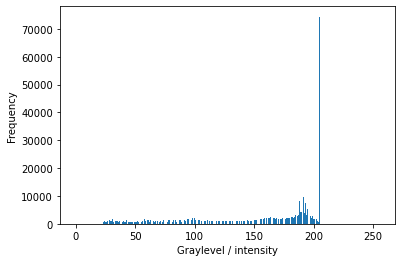

In [10]:
hist = histogram(matrix)
plt.bar(range(256), hist)
plt.xlabel('Graylevel / intensity')
plt.ylabel('Frequency')


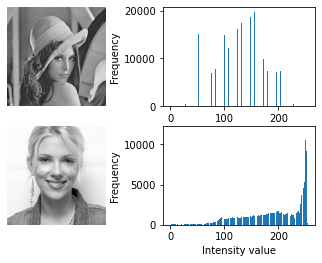

In [16]:
import imageio
img1 = imageio.imread("./grey.png")
img2 = imageio.imread("./scarlett.jpg")

hist_img1 = histogram(img1)
hist_img2 = histogram(img2)

plt.subplot(221)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')
plt.show()

In [17]:
def cumulative_histogram (matrix):
    total = np.cumsum(matrix)
    total = np.matrix(total)
    return total

In [19]:
matrix

matrix([[ 70, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        ...,
        [ 28,  30,  30, ..., 160, 164, 168],
        [180, 188, 191, ..., 194, 195, 195],
        [193, 193, 192, ...,  62,  79,  74]])

In [20]:
cumulative_histogram (matrix)

matrix([[      70,      275,      480, ..., 47652932, 47653011, 47653085]],
       dtype=int32)